In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
faces_all = fetch_olivetti_faces()

In [ ]:
X = faces_all.data
y = faces_all.target

In [ ]:
print(X.shape)
#print(y)

In [ ]:
print(X[0])

In [ ]:
plt.imshow(X[11].reshape(64,64), cmap="gray")

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train) 

In [ ]:
np.mean(log_reg.predict(X_test) == Y_test)

In [67]:
pca = PCA(n_components=2)   # 4096 -> 140
pca.fit(X_train)

print(X_train.shape)

lowX = pca.transform(X_train)
print(lowX.shape)

(200, 4096)
(200, 2)


In [ ]:
log_reg.fit(lowX, Y_train)

In [ ]:
#pca = PCA(n_components=50)   # 4096 ->  50
#pca.fit(X_test)
lowX_test = pca.transform(X_test)
np.mean(log_reg.predict(lowX_test) == Y_test)

In [60]:
print(pca.singular_values_)

[62.81774  45.419098]


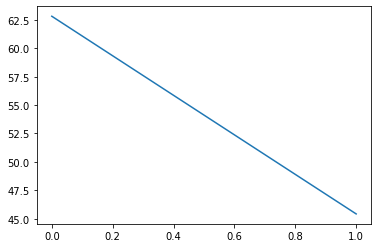

In [61]:
plt.plot(pca.singular_values_)

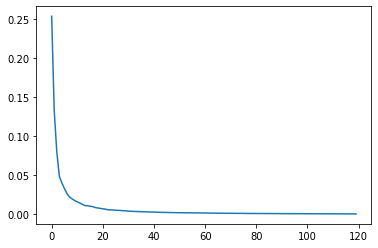

In [65]:
plt.plot(pca.explained_variance_ratio_)

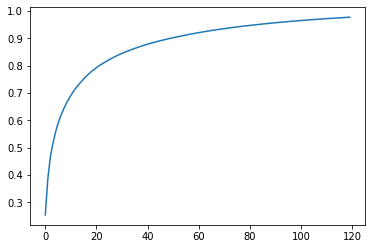

In [66]:
cs = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cs)

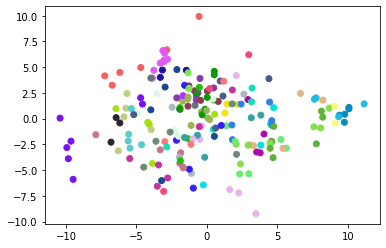

In [71]:
col =  np.random.rand(40,3)
colors = [col[i]  for i in Y_train ]
plt.scatter(lowX[:,0], lowX[:,1], c=colors)

(200, 2)
(200, 1)


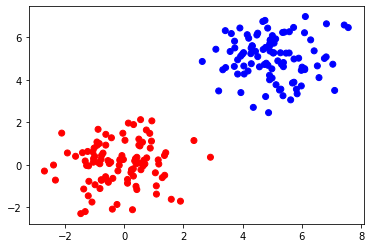

In [73]:
samples = 100

x_data0 = np.random.normal(0, 1, size=[samples,2])  # r == 0 
x_data1 = np.random.normal(5, 1, size=[samples,2])  # b == 1
x_data = np.vstack([x_data0, x_data1])
print(x_data.shape)

y_data = np.vstack([np.zeros(samples).reshape(samples,1) , np.ones(samples).reshape(samples,1) ]) 
print(y_data.shape)

colors = ["red"  if i == 0  else  "blue"  for i  in y_data   ]

plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [ ]:
model = KMeans(n_clusters=2, init="random", max_iter=1).fit(x_data)
